In [8]:
# Generic imports
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import copy
import os
from importlib import reload

# Local imports
import sys
sys.path.append('../../../')
import stlstuff as sls
import imagestuff as ims

In [9]:
# Graphics
%matplotlib notebook

In [10]:
# Get the retrieved surface
pwd = os.getcwd()
print(pwd)
startpos = pwd.find('crystals/')
case = pwd[startpos+9:]; print(case)
Segmentnamelistroot = 'Segments3'

surfaceroot = ''
npzfile = np.load(Segmentnamelistroot+'retrieved.npz')
stlfile = Segmentnamelistroot+'retrievedwskirt.stl'

imageroot = np.array_str(npzfile['imageroot'])

dx,dy,cA,cB,cC,cD,Filename = ims.getc2(surfaceroot, 'SEMimages/', imageroot)
nx1list = npzfile['nx1list']
nx2list = npzfile['nx2list']
ny1list = npzfile['ny1list']
ny2list = npzfile['ny2list']

nxi = npzfile['nxi']; #print(nxi)
nyi = npzfile['nyi']; #print(nyi)
dnx = npzfile['dnx']; print(dnx)
dny = npzfile['dny']; print(dny)
solution = npzfile['solution']; #print(np.shape(solution))
print (dx,dy)

/Users/nesh/Documents/repositories/Lincoln2019/crystals_matthew/2019-06-28/case2.0
esh/Documents/repositories/Lincoln2019/crystals_matthew/2019-06-28/case2.0
SEMimages/20190628_case2.0-A.bmp
SEMimages/20190628_case2.0-B.bmp
SEMimages/20190628_case2.0-C.bmp
SEMimages/20190628_case2.0-D.bmp
0.09803921568627416
0.09999999999999964
0.3307292 0.3307292


In [11]:
# Extract the surface
nx1tot = min(nx1list)
nx2tot = max(nx2list)
ny1tot = min(ny1list)
ny2tot = max(ny2list)
nxtot = nx2tot-nx1tot
nytot = ny2tot-ny1tot
settemp = solution[ny1tot:ny2tot,nx1tot:nx2tot]; print (np.shape(settemp))

(120, 120)


The next cell adds a skirt around the data

In [12]:
# get the dimensions 
nx,ny = np.shape(settemp)

# define the bottom of the skirt
bottom = np.min(settemp)- 20


# add a row to beginning 
startrow = np.ones(ny)*bottom; #print(np.shape(startrow))

# add a row to the end
settemp1 = np.vstack ((startrow,settemp,startrow)); #print(np.shape(settemp1))
settemp2 = np.transpose(settemp1); #print(np.shape(settemp2))

# add a column to beginning
newcol = np.ones(nx+2)*bottom; #print(np.shape(newcol))

# add a column to the end
settemp3 = np.vstack ((newcol,settemp2,newcol))
settemp4 = np.transpose (settemp3)

# Update the dimensions
nytot, nxtot = np.shape(settemp4)
print (nxtot,nytot)

122 122


40.0182332
40.0182332


<IPython.core.display.Javascript object>


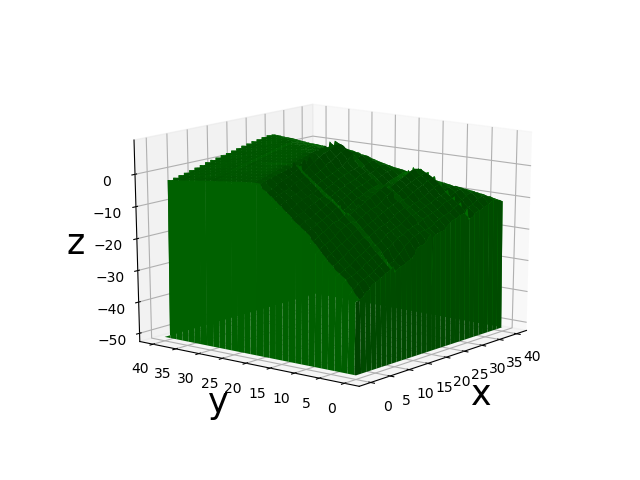

Text(0.5,0,'z')

In [13]:
# Display the surface here

# Set display parameters
fontsize = 25
linewidth = 2
xmaxtot = (nxtot-1)*dx; print (xmaxtot)
ymaxtot = (nytot-1)*dy; print (ymaxtot)
surf_ytot = np.linspace(0,ymaxtot,nytot); #print surf_ytot[1]-surf_ytot[0]; 
surf_xtot = np.linspace(0,xmaxtot,nxtot); #print surf_xtot[1]-surf_xtot[0]; 
surf_xgridtot, surf_ygridtot = np.meshgrid(surf_xtot,surf_ytot)
surf_ygridtot_flipped = np.flipud(surf_ygridtot)

# Display it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(surf_xgridtot, surf_ygridtot_flipped, settemp4, rstride=4,cstride=4, color='g')
ax.view_init(azim=-100,elev=22)
ax.set_xlabel('x',fontsize=fontsize)
ax.set_ylabel('y',fontsize=fontsize)
ax.set_zlabel('z',fontsize=fontsize)

In [14]:
# Save as stl (with possible vertical amplification)
sls.numpy2stl(settemp4, stlfile, scale=dx, solid=False)
print('Complete')

Creating top mesh...
Complete
